# DataSet #3: Mobilitat entre Municipis

Autor: Marc Bosch Manzano<br>
Data: Octubre 2025<br>
Iteració: 2a<br>
Projecte: MobiCat

## Anàlisi de les Distribucions dels Atributs

### Importació de Llibreries

In [46]:
PACKAGES = ["pandas", "matplotlib", "numpy", "seaborn"]
COLORS = ["viridis", "plasma", "inferno", "magma", "cividis"]

import importlib
import sys
sys.path.append('../mobicat_python_utils')

import utils
importlib.reload(utils)

import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import IPython.display 
IPython.display.clear_output()

### Importació de les Dades

**Important**: importa al directori *test-data* els següents fitxers o canviar el directori pel directori amb els fitxers. 
```bash
    movilidad_barrios_2023-01_origen.csv
    movilidad_municipios_2023-01_origen.csv
    movilidad_mun_barrios_2023-01_origen.csv
```

In [47]:
mobility_directory = "./test-data/"
mobility_file_name = "movilidad_municipios_2023-01_origen.csv"
mobility_file_path = os.path.join(mobility_directory, mobility_file_name)

mobility_df = pd.read_csv(mobility_file_path, dtype=str)
mobility_df["viajes"] = mobility_df["viajes"].astype(int)
mobility_df["day"] = pd.to_datetime(mobility_df["day"])
mobility_df = mobility_df[mobility_df["viajes"] > 0]

Trobem la distribució dels viatges per municipi.

In [131]:
municipalities_df = utils.group_by_municipality(mobility_df)

In [175]:
def plot_histogram_and_boxplot(
        array, 
        figsize = (9, 6), 
        height_ratios = [5, 2], 
        title = "", 
        xlabel = "", 
        ylabel = "", 
        ticks=None, 
        labels=None,
        histogram_bins = "auto", 
        histogram_color = None, 
        boxplot_width = 0.7, 
        boxplot_color=None
    ) -> None:

    fig, (ax1, ax2) = plt.subplots(
        nrows=2, 
        ncols=1, 
        figsize=figsize, 
        height_ratios=height_ratios
    )
    
    ax1.hist(x=array, bins=histogram_bins, color=histogram_color)
    ax1.set_ylabel(ylabel)

    
    sns.boxplot(x=array, ax=ax2, width=boxplot_width, color=boxplot_color)
    ax2.set_xlabel(xlabel) 
    ax2.set_ylabel("") 

    fig.suptitle(title)
    if ticks is not None and labels is not None:
        ax1.set_xticks(ticks)
        ax1.set_xticklabels(labels)
        ax2.set_xticks(ticks) 
        ax2.set_xticklabels(labels)
    plt.show()

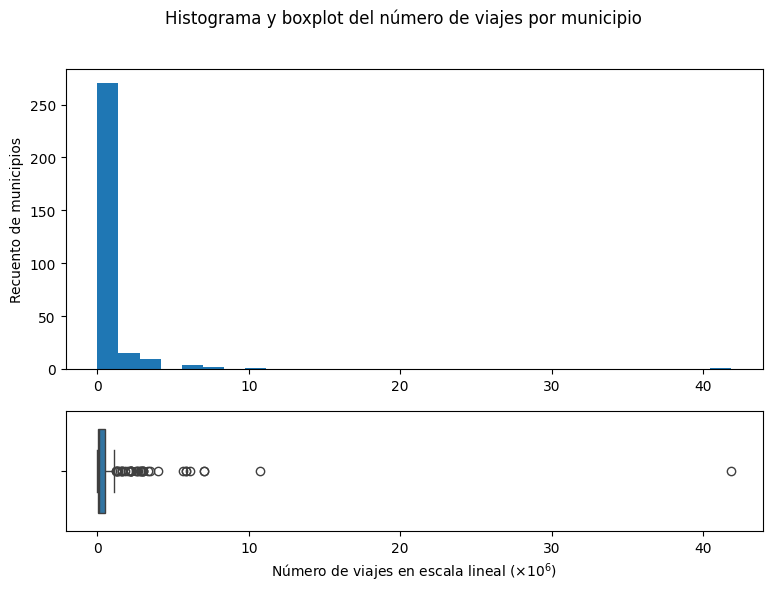

In [176]:
plot_histogram_and_boxplot(
    array=municipalities_df["viajes"],
    figsize=(9, 6),
    height_ratios=[5, 2],
    histogram_bins=30,
    ticks=(ticks := [0e7, 1e7, 2e7, 3e7, 4e7]),
    labels=[int(t/1e6) for t in ticks],
    xlabel="Número de viajes en escala lineal $(×10^6)$",
    ylabel="Recuento de municipios",
    title="Histograma y boxplot del número de viajes por municipio",
)

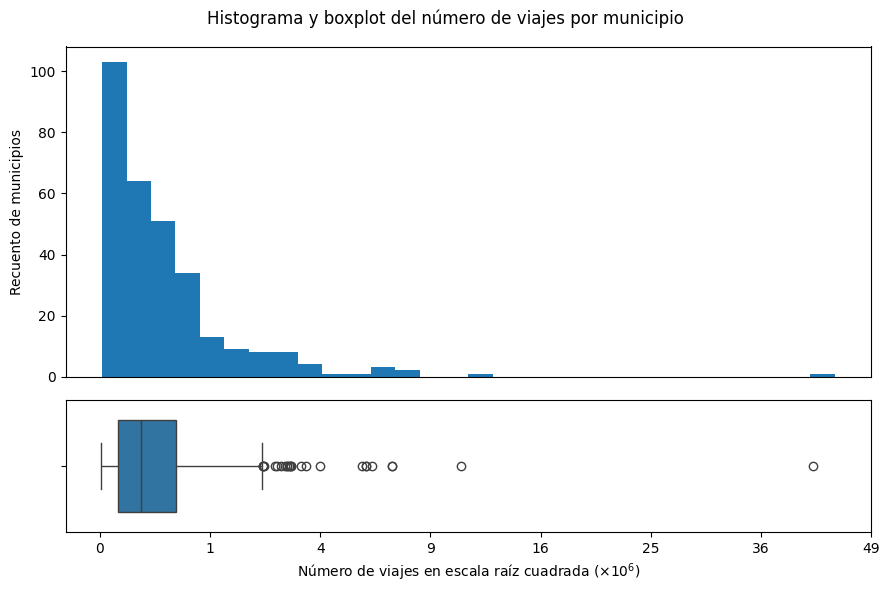

In [137]:
plot_histogram_and_boxplot(
    array=np.sqrt(municipalities_df["viajes"]),
    figsize=(9, 6),
    height_ratios=[5, 2],
    ticks=(ticks := [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000]),
    labels=[int(t**2/1e6) for t in ticks],
    histogram_bins= 30,
    xlabel="Número de viajes en escala raíz cuadrada $(×10^6)$",
    ylabel="Recuento de municipios",
    title="Histograma y boxplot del número de viajes por municipio",
)

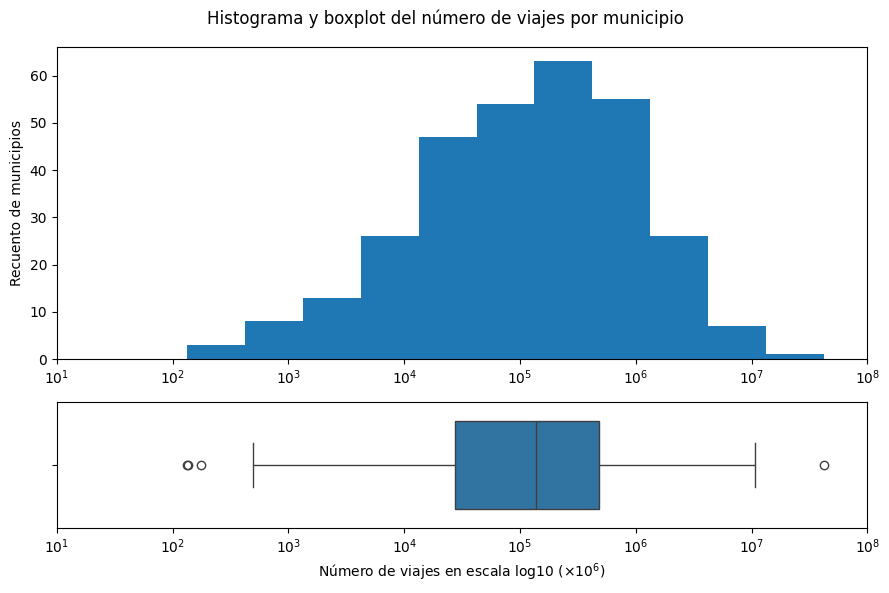

In [116]:
plot_histogram_and_boxplot(
    array=np.log10(municipalities_df["viajes"]),
    figsize=(9, 6),
    height_ratios=[5, 2],
    ticks=(ticks := [1, 2, 3, 4, 5, 6, 7, 8]),
    labels=[f"$10^{t}$" for t in ticks],
    histogram_bins=11,
    xlabel="Número de viajes en escala log10 $(×10^6)$",
    ylabel="Recuento de municipios",
    title="Histograma y boxplot del número de viajes por municipio"
)

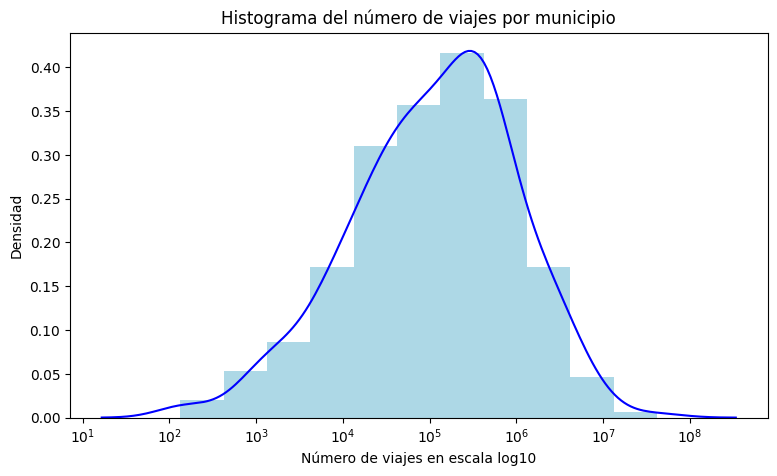

In [ ]:
def plot_histogram_with_density(
        array,
        figsize = (9,5),
        histogram_color = None,
        histogram_bins = "auto",
        density_color = None,
        title = "",
        xlabel = "",
        ylabel = "",
        ticks = None,
        labels = None
    ) -> None:
    plt.figure(figsize=figsize)
    plt.hist(x=array, density=True, bins=histogram_bins, color=histogram_color)
    sns.kdeplot(x=array, color=density_color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if ticks is not None and labels is not None:
        plt.xticks(ticks, labels)
    plt.show()

plot_histogram_with_density(
    array=np.log10(municipalities_df["viajes"]),
    figsize=(9,5),
    histogram_color="lightblue",
    histogram_bins=11,
    density_color="blue",
    title="Histograma del número de viajes por municipio",
    xlabel="Número de viajes en escala log10",
    ylabel="Densidad",
    ticks=(ticks:=[ 1, 2, 3, 4, 5, 6, 7, 8]),
    labels=[f"$10^{t}$" for t in ticks]
)

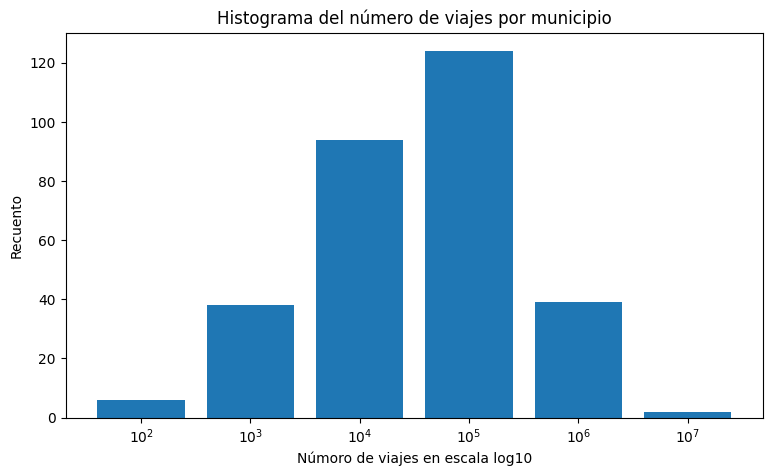

In [130]:
histogram_bins = [0, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, float("inf")]

municipalities_df["bin"] = pd.cut(
    x=municipalities_df["viajes"],
    bins=histogram_bins,
    labels=range(1, len(histogram_bins)),
    include_lowest=True
).astype(int) 

count_bins = municipalities_df.groupby(by="bin").count().reset_index()

municipalities_df.head(20)

plt.figure(figsize=(9, 5))

plt.bar(
    count_bins["bin"],
    count_bins["municipio"],

)

plt.title("Histograma del número de viajes por municipio")
plt.xlabel("Númoro de viajes en escala log10")
plt.ylabel("Recuento")

ticks = [2, 3, 4, 5, 6, 7]
labels = [f"$10^{t}$" for t in ticks]

plt.xticks(ticks, labels)

plt.show()